In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('./movies_train.csv')
test = pd.read_csv('./movies_test.csv')

### movies_train.csv / movies_test.csv
- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

# 데이터 전처리

In [32]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [33]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [34]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [35]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [36]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [37]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [38]:
display(train)
display(test)

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,1475091,2014,8,1,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,1716438,2013,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2475,2010,9,0,1,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2192525,2015,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,125,2,304,3,2010,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,113,4,275,3,2010,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,115,3,419,7,2010,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,116,2,408,2,2010,2,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,110,1,380,1,2010,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,78,1,4,4,2015,11,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
239,86,0,18,2,2015,10,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
240,107,0,224,4,2015,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
241,102,1,68,7,2015,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 모델 생성 및 예측(과제부분)

## 1. Random Forest

In [39]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [40]:
from sklearn.tree import DecisionTreeRegressor
DTRegressor = DecisionTreeRegressor()
from sklearn.model_selection import train_test_split
## 모델 성능 검증을 위해 valid data set 을 기존 train data set에서 7:3 비율로 만들었다
train_data, valid_data , train_target, valid_target = train_test_split(
    train_x, train_y, test_size = 0.3, random_state = 1000) 

In [41]:
model=RandomForestRegressor()
model.fit(train_data, train_target)

RandomForestRegressor()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score
rf_pred = model.predict(valid_data)

print('MSE:: {:.5f}'.format(mean_squared_error(valid_target, rf_pred)),
     'R2:: {:.5f}'.format(r2_score(valid_target, rf_pred)))
#      'Accuracy:: {:.5f}'.format(accuracy_score(valid_target, rf_pred)),
#      'F1_Score:: {:.5f}'.format(f1_score(valid_target, rf_pred)),
#      'ROC_AUC_Score:: {:.5f}'.format(roc_auc_score(valid_target, rf_pred)), sep = '\n')

MSE:: 2754936532646.54688 R2:: 0.12114


## 2. Decision Tree 

In [43]:
# GridSearch
from sklearn.model_selection import GridSearchCV

param_range1 = [i for i in range(11)]
param_range2 = [10, 15, 20, 25, 30]
param_range3 = ['mse','mae']

param_grid = [{'max_depth': param_range1,
              'min_samples_leaf': param_range2,
              'criterion': param_range3}]

gs = GridSearchCV(estimator = DTRegressor,
                 param_grid = param_grid, 
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1)

gs = gs.fit(train_data, train_target)

print(-gs.best_score_)
print(gs.best_params_)

2423021246802.7646
{'criterion': 'mae', 'max_depth': 4, 'min_samples_leaf': 20}


C:\Users\hi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan -3.01865224e+12 -3.01865224e+12 -3.01865224e+12
 -3.01865224e+12 -3.01865224e+12 -2.69281789e+12 -2.83819128e+12
 -2.67217293e+12 -2.48105204e+12 -2.48105204e+12 -2.73122040e+12
 -2.79076220e+12 -2.65104275e+12 -2.47733370e+12 -2.48727570e+12
 -2.71813134e+12 -2.74322822e+12 -2.63007730e+12 -2.47379895e+12
 -2.48644586e+12 -2.71474086e+12 -2.75223881e+12 -2.62971934e+12
 -2.47377296e+12 -2.48613551e+12 -2.71730275e+12 -2.75238017e+12
 -2.62980335e+12 -2.47380773e+12 -2.48616638e+12 -2.71883077e+12
 -2.75242818e+12 -2.62976372e+12 -2.47378970e+12 -2.48608594e+12
 -2.71874078e+12 -2.75237592e+12 -2.62974110e+12 -2.47378066e+12
 -2.48608476e+12 -2.71868126e+12 -2.75235735e+12 -2.62972303e+12
 -2.47377919e+12 -2.48608476e+12 -2.71868436e+12 -2.75231252e+12
 -2.62972306e+1

In [44]:
best_tree = gs.best_estimator_ 
best_tree.fit(train_data, train_target)

DecisionTreeRegressor(criterion='mae', max_depth=4, min_samples_leaf=20)

In [45]:
best_pred = best_tree.predict(valid_data)
print('MSE:: {:.5f}'.format(mean_squared_error(valid_target, best_pred)),
     'R2:: {:.5f}'.format(r2_score(valid_target, best_pred)))

MSE:: 2194318339619.12085 R2:: 0.29999


## 3. XGB BOOSTER 

In [46]:
import xgboost as xgb
XGBRegressor = xgb.XGBRegressor()
XGBRegressor.fit(train_data,train_target)
XGBpred = XGBRegressor.predict(valid_data)
print('MSE:: {:.5f}'.format(mean_squared_error(valid_target, XGBpred)),
     'R2:: {:.5f}'.format(r2_score(valid_target, XGBpred)))  ## 음의 관계...

MSE:: 3559314804443.21094 R2:: -0.13546


## 4. Gradient Boosting 

In [47]:
from sklearn.ensemble import GradientBoostingRegressor 


gbm = GradientBoostingRegressor(random_state = 1000)
gbm.fit(train_data,train_target)

gbm_pred = gbm.predict(valid_data)
# gb_accuracy = accuracy_score(valid_target, gbm_pred)


print('MSE:: {:.5f}'.format(mean_squared_error(valid_target, gbm_pred)),
     'R2:: {:.5f}'.format(r2_score(valid_target, gbm_pred)))
# print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))


MSE:: 2863393334576.91748 R2:: 0.08655


### 모델 성능 평균 == > validaton data set 없이 초기 train/ test data 이용

In [48]:
## DT
best_tree2 = gs.best_estimator_
best_tree2.fit(train_x, train_y)
pred_Dt = best_tree.predict(test)

In [49]:
## XGB 
XGBRegressor2 = xgb.XGBRegressor()
XGBRegressor2.fit(train_x,train_y)
pred_Xgb = XGBRegressor.predict(test)

In [50]:
## GBM 
gbm2 = GradientBoostingRegressor(random_state = 1000)
gbm2.fit(train_x,train_y)
pred_Gbm = gbm2.predict(test)


In [51]:
### RF 
model2=RandomForestRegressor()
model2.fit(train_x, train_y)
pred_Rf = model2.predict(test)

- 이후 4개의 모델의 평균값을 아래 submission 파일에 새로운 box_off_num column 에 입력할 예정이다 


# 제출

In [52]:
submission = pd.read_csv('./submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [53]:
submission['box_off_num'] = sum([pred_Rf, pred_Dt, pred_Xgb,pred_Gbm])/4

In [54]:
submission = submission.sort_values(by = 'box_off_num')

## gradient boosting 과 xgb boosting 을 포함하면 box_off_num에 음의 값이 존재한다. 

In [55]:
submission

,title,box_off_num
230,악인은 살아 있다,-3.772093e+04
222,돼지 같은 여자,-2.735833e+04
194,나는 야한 여자가 좋다 3,-2.086625e+04
181,나는 야한 여자가 좋다,-2.086625e+04
126,젊은 엄마,-2.070787e+04
...,...,...
229,베테랑,4.647369e+06
135,용의자,4.924756e+06
142,박수건달,5.184881e+06
179,군도: 민란의 시대,6.703816e+06


In [56]:
submission2 = pd.read_csv('./submission2.csv')
submission2

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


## 새롭게 만든 submission2 에서는 Decision tree와 random forest만을 이용했다
- 양의 값만 나옴
- 하지만 대회에 파일을 제출했을시 XGB boosting과 gradient boosting을 포함한 예측값이 더 점수가 높았다 

In [57]:
submission2['box_off_num'] = sum([pred_Dt,pred_Rf])/2
submission2 = submission2.sort_values(by = 'box_off_num')

In [58]:
submission2

,title,box_off_num
242,조선안방 스캔들-칠거지악 2,1143.080
194,나는 야한 여자가 좋다 3,1436.360
181,나는 야한 여자가 좋다,1436.360
26,할,1523.990
126,젊은 엄마,1543.085
...,...,...
229,베테랑,4023149.320
142,박수건달,4178767.865
135,용의자,4604742.925
179,군도: 민란의 시대,4621211.685


In [59]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

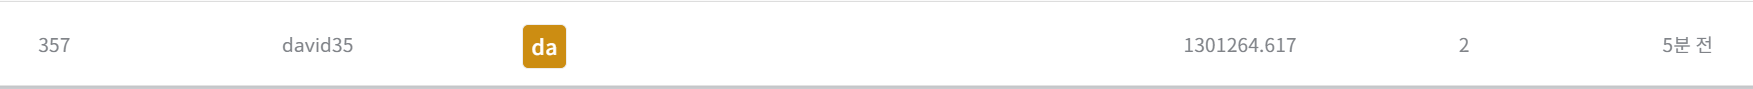